## Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import os

In [2]:
import matplotlib
matplotlib.__version__

'3.8.4'

## Importing Files (dataset with bike data and temperatures for Q1 of 2022) 

In [3]:
df_Q1=pd.read_pickle(r"C:\Users\Windows\NYC_bike_sharing\Project Files\merged_bike_temps_Q1.pkl")
df_Q1.head(3)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,_merge
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,2022-01-18,1.8,both
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,2022-01-21,-6.0,both
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member,2022-01-22,-5.9,both


## Cleaning the Imported Dataset by dropping the '_merge' column

In [4]:
df_Q1.drop(columns = {'_merge'}, inplace = True)
df_Q1.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,2022-01-18,1.8
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,2022-01-21,-6.0
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member,2022-01-22,-5.9


## Converting Data Types for Memory Efficiency

In [5]:

# Convert to appropriate data types

df_Q1['rideable_type'] = df_Q1['rideable_type'].astype('category')
df_Q1['member_casual'] = df_Q1['member_casual'].astype('category')

df_Q1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179576 entries, 0 to 4179575
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  date                datetime64[ns]
 14  average_temp        float64       
dtypes: category(2), datetime64[ns](3), float64(5), object(5)
memory usage: 422.5+ MB


In [6]:
# # Downcast numerical columns

df_Q1['start_lat'] = pd.to_numeric(df_Q1['start_lat'], downcast='float')
df_Q1['start_lng'] = pd.to_numeric(df_Q1['start_lng'], downcast='float')
df_Q1['end_lat'] = pd.to_numeric(df_Q1['end_lat'], downcast='float')
df_Q1['end_lng'] = pd.to_numeric(df_Q1['end_lng'], downcast='float')
df_Q1['average_temp'] = pd.to_numeric(df_Q1['average_temp'], downcast='float')

df_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179576 entries, 0 to 4179575
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       category      
 13  date                datetime64[ns]
 14  average_temp        float32       
dtypes: category(2), datetime64[ns](3), float32(5), object(5)
memory usage: 342.8+ MB


## Sorting the index of the dataset

In [7]:
df_temp_Q1 = df_Q1.set_index('date').sort_index()
df_temp_Q1.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp
date,,,,,,,,,,,,,,
2022-01-01,C401E951D3CE9CF1,classic_bike,2022-01-01 02:13:26,2022-01-01 02:14:57,Greenwich St & Perry St,5922.04,Perry St & Bleecker St,5922.07,40.734982,-74.006973,40.735355,-74.004829,member,11.6
2022-01-01,008C583994B6DC9E,docked_bike,2022-01-01 14:05:37,2022-01-01 14:24:46,Columbus Ave & W 72 St,7175.05,5 Ave & E 78 St,7161.08,40.777058,-73.978989,40.776321,-73.964272,casual,11.6
2022-01-01,2AFE5C9C23A7251A,classic_bike,2022-01-01 10:46:52,2022-01-01 11:05:27,E 11 St & 1 Ave,5746.14,Division St & Bowery,5270.08,40.729538,-73.984268,40.714191,-73.996735,member,11.6


In [8]:
# Exporting bike data as pkl
path = r'C:\Users\Windows\NYC_bike_sharing\Project Files'
df_Q1.to_pickle(os.path.join(path, 'df_Q1.pkl'))

In [9]:
df_temp_Q1.to_pickle(os.path.join(path, 'df_temp_Q1.pkl'))

## Basic Plot with Pandas

<Axes: xlabel='date'>

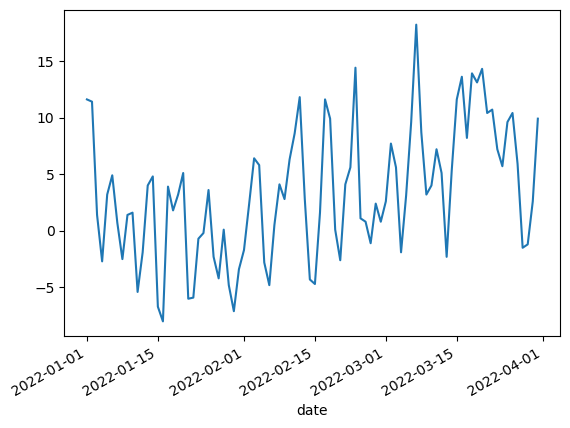

In [42]:
df_temp_Q1['average_temp'].plot()

## Aggregate Trips By Date

In [11]:
df_temp_Q1.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'average_temp'],
      dtype='object')

In [13]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df_temp_Q1.groupby(['date'])['ride_id'].count()).reset_index()

In [14]:
df_group.head(3)

,date,ride_id
0,2022-01-01,20895
1,2022-01-02,44234
2,2022-01-03,34126


In [15]:
# merging df_group with the df_temp_Q1 dataframe 
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df_temp_Q1_merged= df_temp_Q1.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df_temp_Q1_merged['_merge'].value_counts(dropna = False))


_merge
both          4179576
left_only           0
right_only          0
Name: count, dtype: int64


In [17]:
df_temp_Q1_merged = df_temp_Q1_merged.set_index('date')
df_temp_Q1_merged.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,C401E951D3CE9CF1,classic_bike,2022-01-01 02:13:26,2022-01-01 02:14:57,Greenwich St & Perry St,5922.04,Perry St & Bleecker St,5922.07,40.734982,-74.006973,40.735355,-74.004829,member,11.6,20895,both
2022-01-01,008C583994B6DC9E,docked_bike,2022-01-01 14:05:37,2022-01-01 14:24:46,Columbus Ave & W 72 St,7175.05,5 Ave & E 78 St,7161.08,40.777058,-73.978989,40.776321,-73.964272,casual,11.6,20895,both
2022-01-01,2AFE5C9C23A7251A,classic_bike,2022-01-01 10:46:52,2022-01-01 11:05:27,E 11 St & 1 Ave,5746.14,Division St & Bowery,5270.08,40.729538,-73.984268,40.714191,-73.996735,member,11.6,20895,both


In [19]:
# Cleaning the merged Dataset by dropping the '_merge' column
df_temp_Q1_merged.drop(columns = {'_merge'}, inplace = True)
df_temp_Q1_merged.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp,bike_rides_daily
date,,,,,,,,,,,,,,,
2022-01-01,C401E951D3CE9CF1,classic_bike,2022-01-01 02:13:26,2022-01-01 02:14:57,Greenwich St & Perry St,5922.04,Perry St & Bleecker St,5922.07,40.734982,-74.006973,40.735355,-74.004829,member,11.6,20895
2022-01-01,008C583994B6DC9E,docked_bike,2022-01-01 14:05:37,2022-01-01 14:24:46,Columbus Ave & W 72 St,7175.05,5 Ave & E 78 St,7161.08,40.777058,-73.978989,40.776321,-73.964272,casual,11.6,20895
2022-01-01,2AFE5C9C23A7251A,classic_bike,2022-01-01 10:46:52,2022-01-01 11:05:27,E 11 St & 1 Ave,5746.14,Division St & Bowery,5270.08,40.729538,-73.984268,40.714191,-73.996735,member,11.6,20895


In [25]:
df_temp_Q1_merged.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,average_temp,bike_rides_daily
count,4179576,4179576,4.179576e+06,4.179576e+06,4.170246e+06,4.170246e+06,4.179576e+06,4.179576e+06
mean,2022-02-21 06:44:36.591123968,2022-02-21 07:01:43.184038912,4.073998e+01,-7.397660e+01,4.073982e+01,-7.397675e+01,5.014025e+00,5.377768e+04
min,2022-01-01 00:00:13,2022-01-01 00:02:15,4.063338e+01,-7.402747e+01,4.063338e+01,-7.407146e+01,-8.000000e+00,2.927000e+03
25%,2022-01-31 17:19:52.750000128,2022-01-31 17:33:53.750000128,4.071723e+01,-7.399316e+01,4.071723e+01,-7.399345e+01,8.000000e-01,4.163600e+04
50%,2022-02-24 11:11:12,2022-02-24 11:25:34,4.073971e+01,-7.398186e+01,4.073944e+01,-7.398193e+01,4.800000e+00,5.269500e+04
75%,2022-03-16 07:45:12,2022-03-16 07:57:17,4.076229e+01,-7.396222e+01,4.076201e+01,-7.396222e+01,9.900000e+00,6.817500e+04
max,2022-03-31 23:59:59,2022-04-03 17:40:49,4.088226e+01,-7.388145e+01,4.088226e+01,-7.388000e+01,1.820000e+01,9.528400e+04
std,NaN,NaN,9.405602e-01,2.571051e-01,9.238914e-01,2.803267e-01,5.813330e+00,1.784303e+04


In [21]:
# saving merged dataset as pickle file
df_temp_Q1_merged.to_pickle(os.path.join(path, 'df_temp_Q1_merged.pkl'))

 ## Using Matplotlib (Object Oriented Approach) to plot NYC Temperatures in 2022 - Quarter 1  (Dual Axis)

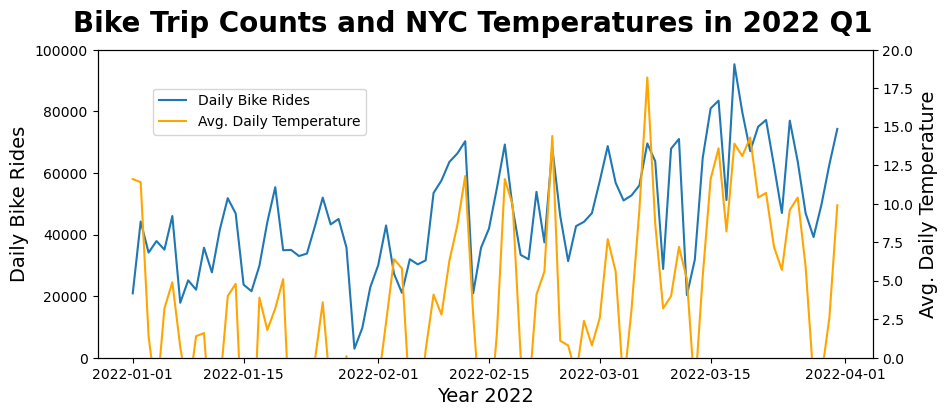

In [41]:
fig, ax = plt.subplots(figsize = (10,4))

fig.suptitle("Bike Trip Counts and NYC Temperatures in 2022 Q1", fontsize=20, fontweight="bold") 
ax.plot(df_temp_Q1_merged["bike_rides_daily"], label="Daily Bike Rides")
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylim(0, 100000)
ax.set_ylabel('Daily Bike Rides', fontsize=14)

ax2 = ax.twinx()

ax2.plot(df_temp_Q1_merged["average_temp"], label="Avg. Daily Temperature",c="orange")
ax2.set_ylim(0, 20)
ax2.set_ylabel('Avg. Daily Temperature', fontsize=14)

fig.legend(bbox_to_anchor = (0.4,0.8))

plt.show()

#### This dual-axis graph was plotted using the object-oriented (OO) approach in maptplotlib. This approach was used because of the possibilities of customizing and adjusting the chart. It is a versatile approach. The main objects of this visual are the figure and the axes. The figure ('fig') refers to the container that holds the plot(s). Each axis (ax) refers to a plot. In this case, we have two plots denoted by ax and ax2 in one container or figure. We start with fig,ax = plt.subplots(figsize=(10, 4)) to define the main figure for plotting. These numbers refer to dimensions of the container. For each plot (e.g., daily bike rides), y-axis limits, y-labels are methods can be used to modify the object (i.e., an axis). 
#### ax2 = ax.twinx() addes a second axis to the figure. The sames methods of plotting, adding y-axis limits, y-labels are applied to this ax2. 
#### fig.suptite() adds a title to the container. 
#### fig.legend() adds a legend to the figure to denote what each color represents. 
#### plot.show() displays the dual-axis graph.